In [1]:
#!/usr/bin/env python
# coding: utf-8
import ldms_backend as ldms_backend 
import pandas as pd

In [2]:
# df_out = ldms_backend.get_processed_df('c4-0c2s6',0,0) 

In [3]:
# get_ipython().run_line_magic('matplotlib', 'notebook')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(style='whitegrid')
from ipywidgets import widgets

import time
import numpy as np
import IPython

#Default Values
global aries_rtr_id
global r
global c

aries_rtr_id = 'c4-0c2s8'
r = 0
c = 0
time_temp =0

In [4]:
#Variable Update
def reload_clicked(b):
    global aries_rtr_id
    global r
    global c

    aries_rtr_id = rtr_id_inp.value
    r = int(r_inp.value)
    c = int(c_inp.value)
    time_temp= int(c_time_temp.value)
    drawit()

HTML(value='<c><b><font color=\'DarkBlue\' size = "+1"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;…

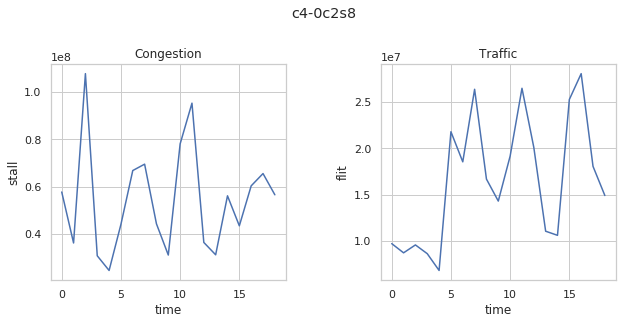

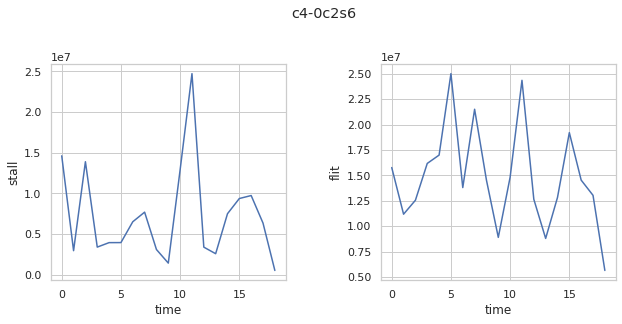

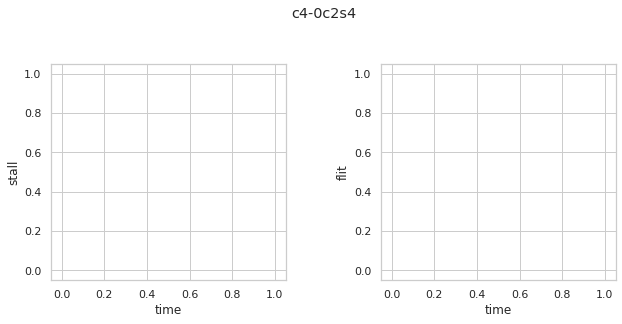

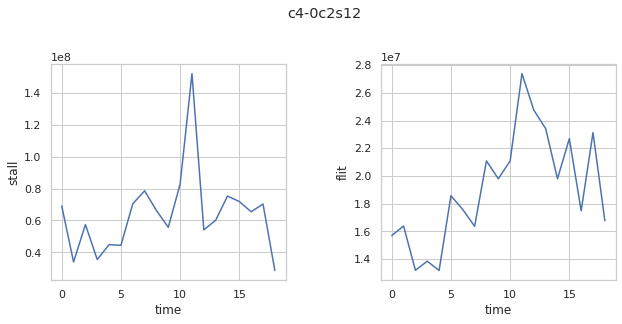

In [5]:
#Title
html_title = widgets.HTML(value = f"<c><b><font color='DarkBlue' size = \"+1\"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LDMS Live</b> </c>")
                          
                          
#Router Counter Tab
rtr_id_inp = widgets.Text(placeholder='Aries Router ID',layout=widgets.Layout(width='150px', height='10px'))
r_inp = widgets.Text(placeholder = 'Row',layout=widgets.Layout(width='50px', height='10px'))
c_inp = widgets.Text(placeholder = 'Col',layout=widgets.Layout(width='50px', height='10px'))
c_time_temp = widgets.Text(placeholder = 'DeltaTime',layout=widgets.Layout(width='100px', height='10px'))
reload_button = widgets.Button(description='Add Graphs',layout=widgets.Layout(width='150px', height='28px'))
reload_button.on_click(reload_clicked)
hbox1 = widgets.HBox([rtr_id_inp,r_inp,c_inp,c_time_temp,reload_button])

#NIC Counter Tab
nid_inp = widgets.Text(placeholder='Node ID',layout=widgets.Layout(width='150px', height='10px'))
hbox2 = widgets.HBox([nid_inp,reload_button])

#App Placement Tab
hbox3 = widgets.HBox()


#Latency Estimate
nid1_inp = widgets.Text(placeholder = 'NID1',layout=widgets.Layout(width='50px', height='10px'))
nid2_inp = widgets.Text(placeholder = 'NID2',layout=widgets.Layout(width='50px', height='10px'))
hbox4 = widgets.HBox([nid1_inp,nid2_inp,reload_button])

tab_contents = ['Router Counters','NIC Counters','App Placement','Latency Estimate']
children = [hbox1,hbox2,hbox3,hbox4]
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, tab_contents[i])


display(html_title)
display(tab)


#Graph Update


fig = plt.figure(figsize=(10,5))
plt.clf()
fig.clf()
ax = fig.subplots(1,2)
fig.tight_layout(pad = 5.0)
ax[0].set_ylabel('Stalls/sec')
ax[0].set_xlabel('Time (sec)')
ax[0].set_title('Congestion')
ax[1].set_ylabel('Flits/sec')
ax[1].set_xlabel('Time (sec)')
ax[1].set_title('Traffic')
#df_out=pd.read_csv('c:\\Pokemon.csv', index_col=0,encoding='latin1')
df_out = ldms_backend.get_processed_df(aries_rtr_id,r,c,100-time_temp,80-time_temp)
sns.lineplot(x='time',y='stall',data=df_out,ax=ax[0])
sns.lineplot(x='time',y='flit',data=df_out,ax=ax[1]);
fig.suptitle(aries_rtr_id)
fig.canvas.draw()


In [6]:
def drawit():
    global fig
    global plt
    global sns
    global df_out
    global time_temp
    
    df_out = ldms_backend.get_processed_df(aries_rtr_id,r,c,100-time_temp,80-time_temp)
 #   df_out=pd.read_csv('c:\\Pokemon.csv', index_col=0,encoding='latin1')
    fig = plt.figure(figsize=(10,5))
    plt.clf()
    fig.clf()
    ax = fig.subplots(1,2)
    fig.tight_layout(pad = 5.0)
    sns.lineplot(x='time',y='stall',data=df_out,ax=ax[0])
    sns.lineplot(x='time',y='flit',data=df_out,ax=ax[1]);
    fig.suptitle(aries_rtr_id)
    fig.canvas.draw()